In [151]:
# List of Imports and Confs
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandana as pdna
import geopandas as gpd
from pandana.loaders import osm
from shapely.geometry import Point, Polygon

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


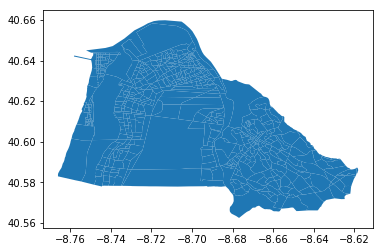

In [152]:
# Load Data
ilhavo = gpd.read_file('../data_gettin/ilhavo.geojson')
ilhavo.plot()

In [153]:
ilhavo.crs

{'init': 'epsg:4326'}

In [154]:
ilhavoBounds = ilhavo.total_bounds
ilhavoBounds

array([-8.76608888, 40.56244201, -8.61809542, 40.65985506])

In [191]:
# Creating Network from bbox

bbox = [ilhavoBounds[1], ilhavoBounds[0], ilhavoBounds[3], ilhavoBounds[2]]
network = osm.pdna_network_from_bbox(*bbox)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](40.56244201,-8.76608888,40.65985506,-8.61809542);>;);out;'}"
Downloaded 3,966.8KB from www.overpass-api.de in 4.03 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 4.13 seconds
Returning OSM data with 28,278 nodes and 5,248 ways...
Edge node pairs completed. Took 17.63 seconds
Returning processed graph with 6,556 nodes and 9,345 edges...
Completed OSM data download and Pandana node and edge table creation in 23.59 seconds


In [156]:
# Query Pois and alocating to dataframe
poi_df = osm.node_query(*bbox, tags='amenity=restaurant')
x, y = poi_df['lon'], poi_df['lat']

In [157]:
network.precompute(3000)

In [158]:
network.set_pois('restaurant', 2000, 10, x, y)
restaurant = network.nearest_pois(2000, "restaurant", num_pois=10)

(<mpl_toolkits.basemap.Basemap at 0x7fbba6654ac8>,
 <Figure size 2304x2880 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbba5bee2e8>)

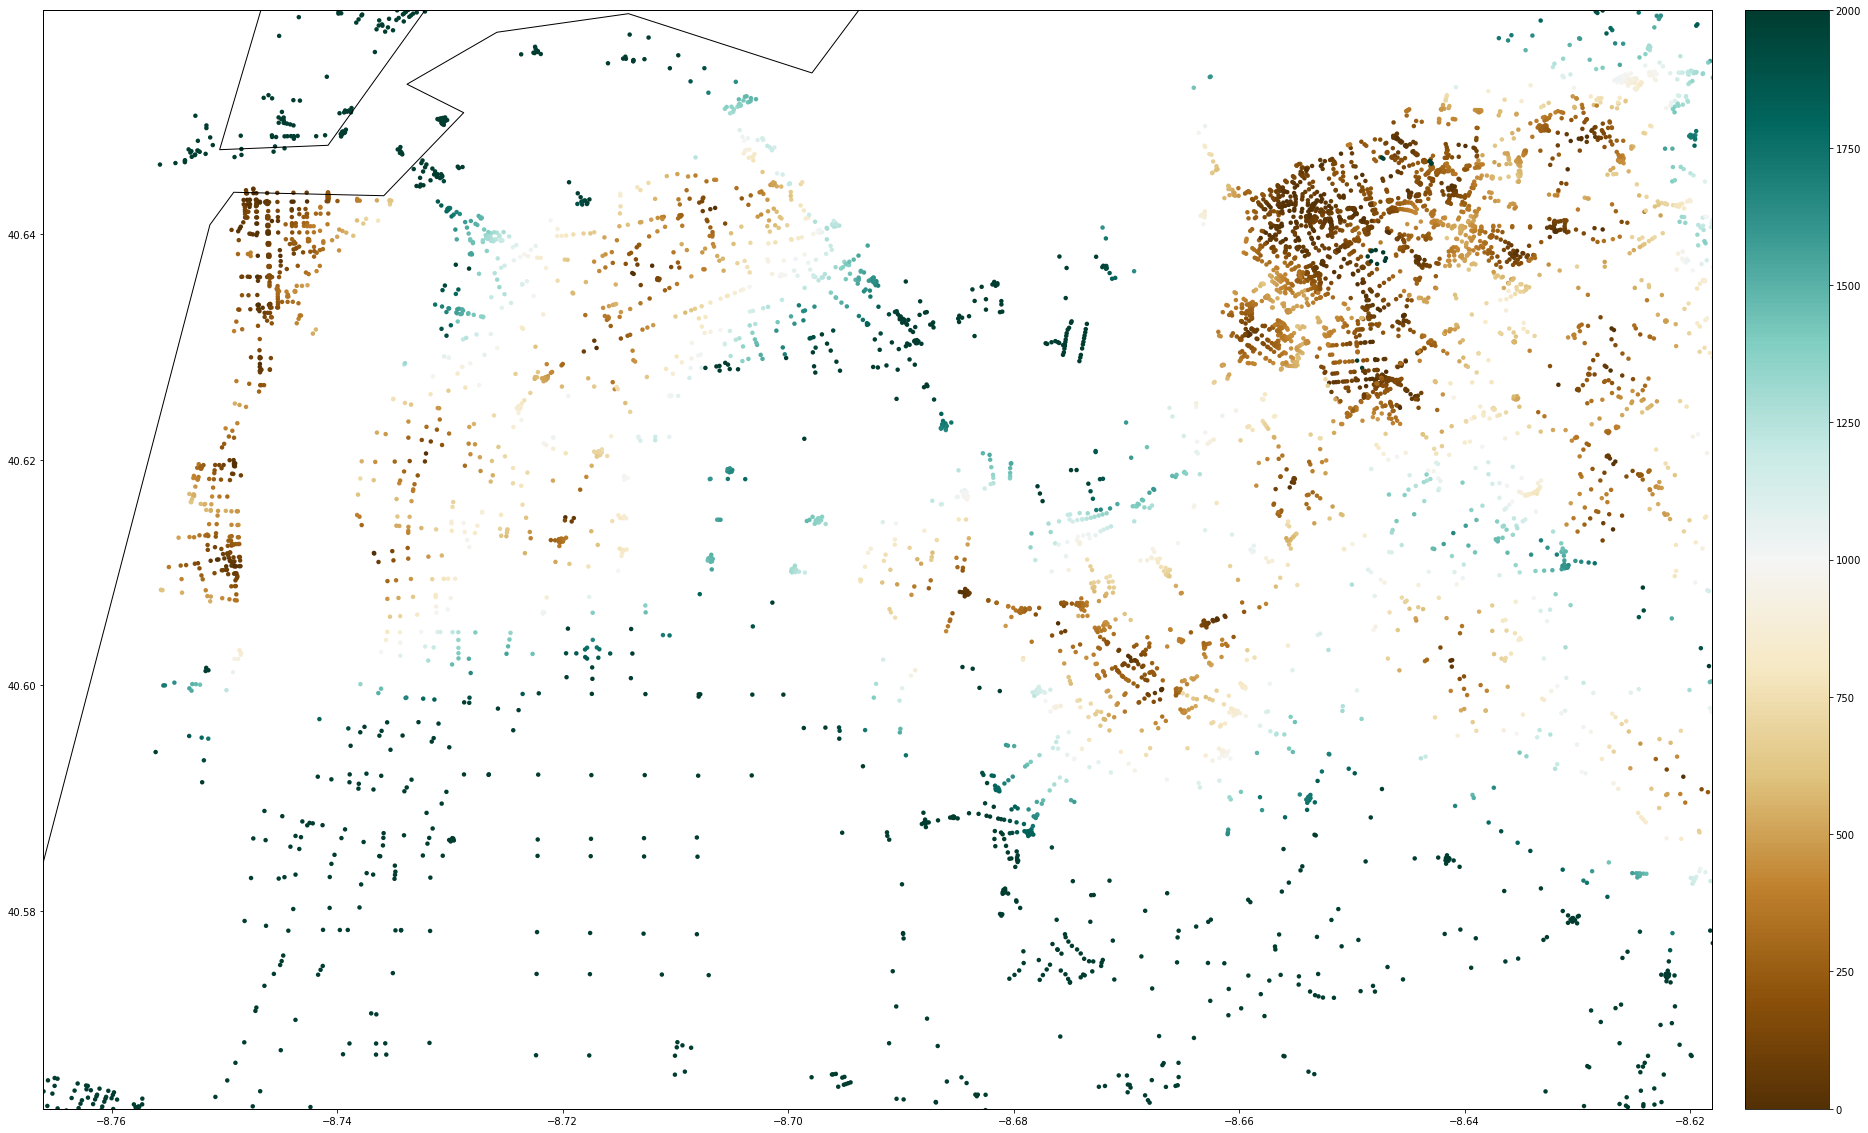

In [159]:
# Plot map
fig_kwargs = {'figsize': [32, 40]}
bmap_kwargs = {'suppress_ticks': False, 'resolution': 'h', 'epsg': '4326'}
plot_kwargs = {'cmap': 'BrBG', 's': 20, 'edgecolor': 'none'}

network.plot(restaurant[1], bbox=bbox,
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

(<mpl_toolkits.basemap.Basemap at 0x7fbba4dc8ac8>,
 <Figure size 2304x2880 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbba4dfd198>)

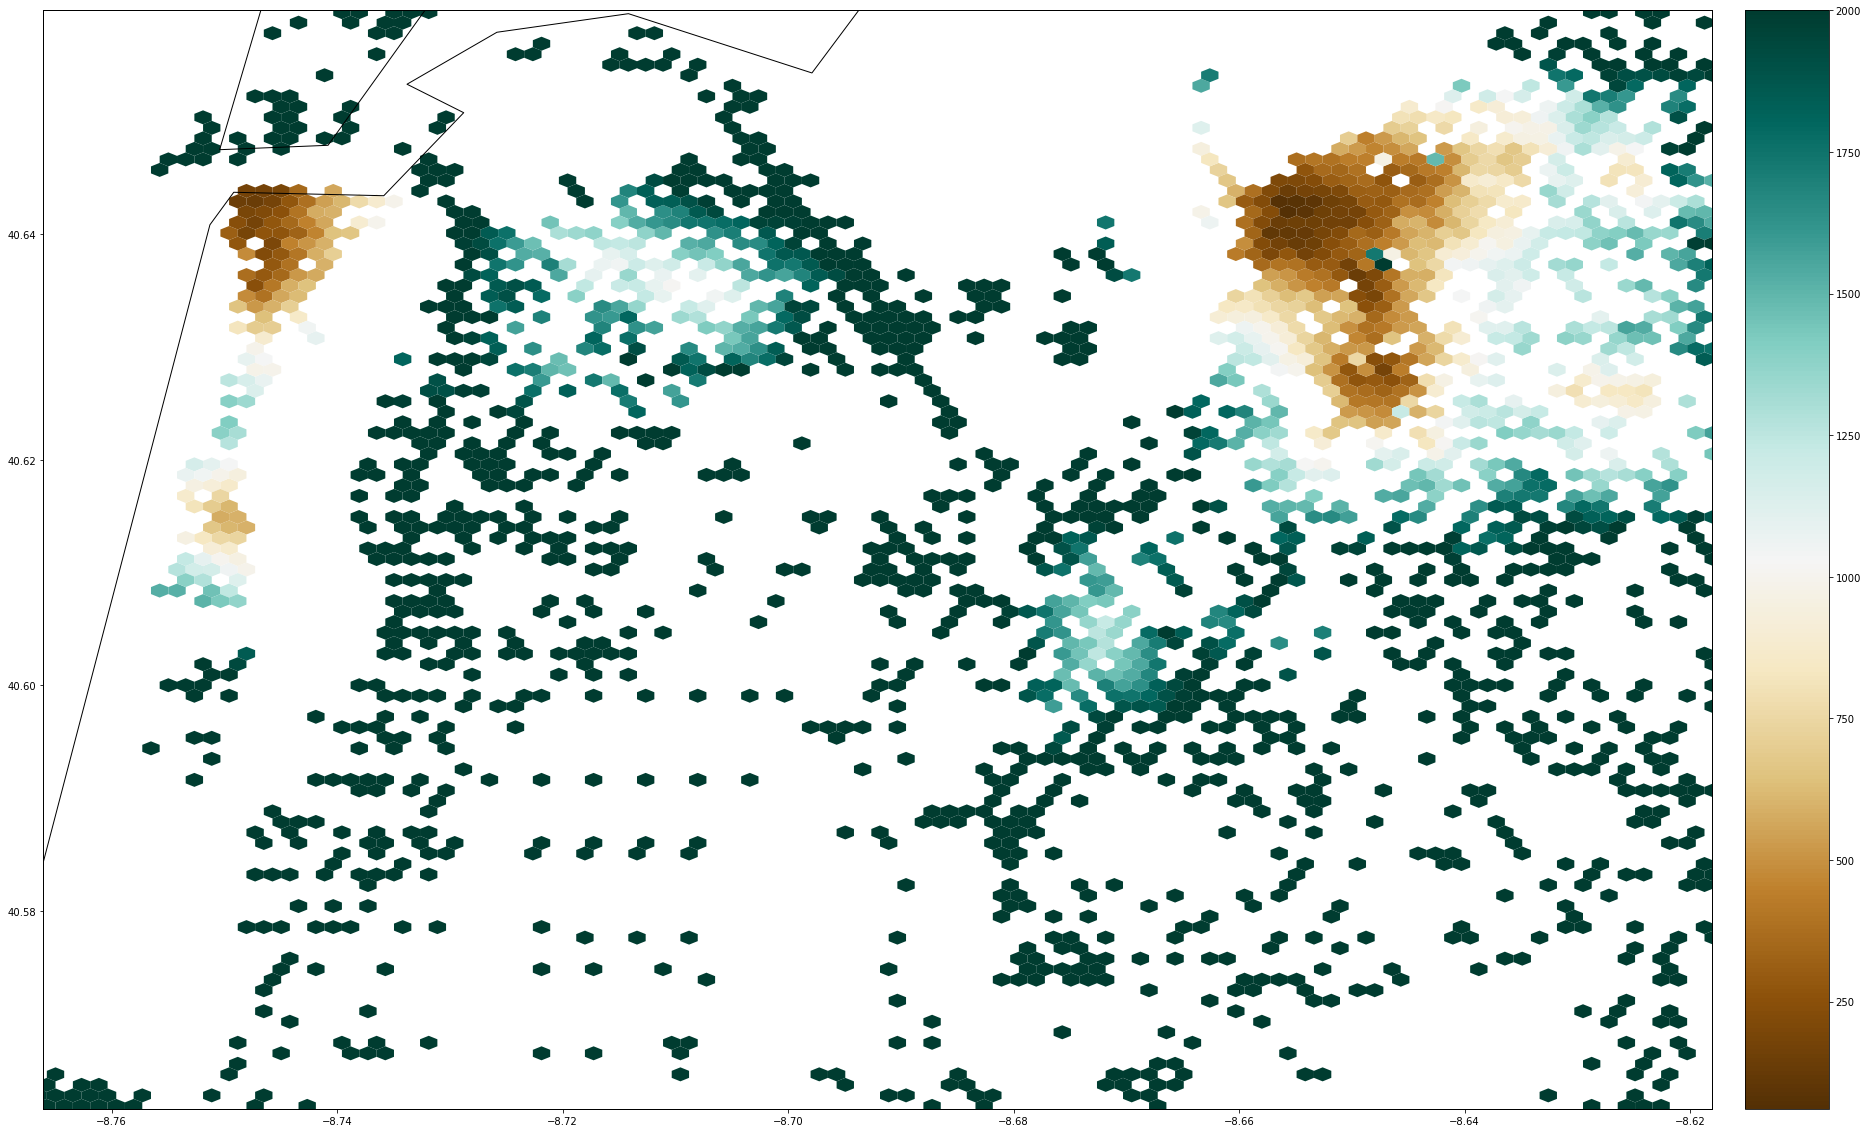

In [160]:
# Plot map
fig_kwargs = {'figsize': [32, 40]}
bmap_kwargs = {'suppress_ticks': False, 'resolution': 'h', 'epsg': '4326'}
plot_kwargs = {'cmap': 'BrBG', 'edgecolor': 'none'}

network.plot(restaurant[5], plot_type='hexbin', bbox=bbox,
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

In [161]:
ilhavo.head()

,Municipio,BGRI11,Area,FID_1,Qualif,geometry
0,ÍLHAVO,01100300101,2742660.00,0,0.00000,"POLYGON ((-8.69965871262055 40.64929478214425,..."
1,ÍLHAVO,01100300108,81187.60,1,7.93651,POLYGON ((-8.717204091481754 40.64174800463831...
2,ÍLHAVO,01100300314,11428.90,2,9.30233,POLYGON ((-8.701292518763481 40.64229706411616...
3,ÍLHAVO,01100300703,6553.63,3,30.55560,POLYGON ((-8.745244375169175 40.64208388727403...
4,ÍLHAVO,01100300505,9130.44,4,0.00000,POLYGON ((-8.744003023074534 40.64210783265598...


In [162]:
ilhavo.dissolve(by='Municipio')

,geometry,BGRI11,Area,FID_1,Qualif
Municipio,,,,,
ÍLHAVO,POLYGON ((-8.741244106386251 40.57829775981112...,01100300101,2742660.0,0,0.0


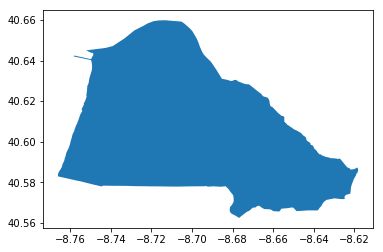

In [163]:
# Get Ilhavo Full Boundaries
boundaryIlhavo = ilhavo.dissolve(by='Municipio')
boundaryIlhavo.plot()

In [164]:
# Nodes manipulation
totalNodes = network.nodes_df
totalNodes.size
poi_df.head()

,addr:city,addr:country,addr:housename,addr:housenumber,addr:postcode,addr:street,addr:unit,alt_name,amenity,contact:facebook,...,opening_hours,operator,outdoor_seating,phone,ref:vatin,self_service,smoking,takeaway,website,wheelchair
id,,,,,,,,,,,,,,,,,,,,,
464762365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506296039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701198768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701198772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701198775,Aveiro,NaN,NaN,14,3810-192,Rua 31 de Janeiro,NaN,NaN,restaurant,NaN,...,NaN,Fonseca & Santos Lda,NaN,+351 234 424780,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# O que eu quero?
# quero verificar quais pontos do totalNodes fazem parte de Ilhavo
# 1 Crie um GEoDataFrame com todos os pontos que estão no limite - OK, só alterar de False pra True ali embaixo
# Preciso plotar somente os pontos na network que estão em Ílhavo


# Grande Verificação. Para todo o Ilhavo
negativeNodes = []
negativeNodesIndex = []
positiveNodes = []
positiveNodesIndex = []
for e in list(totalNodes.index):
    pointObj = Point(totalNodes.loc[e].x,totalNodes.loc[e].y)
    if(boundaryIlhavo.loc['ÍLHAVO'].geometry.contains(pointObj)==False):
        negativeNodes.append(pointObj)
        negativeNodesIndex.append(e)
    else:
        positiveNodes.append(pointObj)
        positiveNodesIndex.append(e)
    

In [166]:
boundaryIlhavo.loc['ÍLHAVO'].geometry.contains(pointObj)

False

In [200]:
dfNegativePoints = pd.DataFrame(data=negativeNodes, index=negativeNodesIndex, columns=['Coordinates'])
dfPositivePoints = pd.DataFrame(data=positiveNodes, index=positiveNodesIndex, columns=['Coordinates'])

In [202]:
dfPositivePoints.head()

,Coordinates
132887998,POINT (-8.7253433 40.6394376)
267983421,POINT (-8.746969699999999 40.6337508)
267983422,POINT (-8.745969799999999 40.6337883)
267983429,POINT (-8.7463625 40.6428796)
267983444,POINT (-8.7470275 40.6362246)


In [208]:
print(network.nodes_df.size)
print(network.node_idx.size)
print(len(network.node_ids))


5516
2758
2758


In [209]:
network.nodes_df = network.nodes_df.drop(dfNegativePoints.index.tolist())
# network.precompute(3000)

KeyError: '[  26019656  330341298  330341301 ... 6445100179 6445100180 6445100181] not found in axis'

In [236]:
network.edges_df


from          to    distance
26019656   1650473977    26019656  1650473977  202.986370
132887998  624272810    132887998   624272810  101.755323
           1650269783   132887998  1650269783    9.057816
267983421  3603994746   267983421  3603994746    2.749155
           3603994747   267983421  3603994747    2.784190
267983422  3603994769   267983422  3603994769    2.825462
267983429  1214724417   267983429  1214724417   40.890244
           1214724466   267983429  1214724466    6.775382
267983444  3596762941   267983444  3596762941   39.123814
330341298  1484655928   330341298  1484655928  151.385838
330341301  330341302    330341301   330341302  111.453785
           1484930831   330341301  1484930831   72.416663
330341302  698090406    330341302   698090406   72.997553
           5217907851   330341302  5217907851   16.967822
330341303  1406433057   330341303  1406433057   12.836285
           1650941224   330341303  1650941224   34.832800
330341306  390280425    330341306   390280425   32.642863
           1489699007   330341306  1489699007   22.144065
330341308  330341607    330341308   330341607   19.187207
330341455  1110673533   330341455  1110673533  250.459604
330341607  385009969    330341607   385009969   36.551098
           1650541330   330341607  1650541330   28.511832
336969772  1389972317   336969772  1389972317  184.059366
336969815  336969817    336969815   336969817   44.658946
336969817  1491747909   336969817  1491747909   77.714532
336969863  1491747907   336969863  1491747907    7.559998
           1714381893   336969863  1714381893   99.183856
336969872  1714382263   336969872  1714382263   20.703671
           1714382466   336969872  1714382466   19.621738
336969881  1389972370   336969881  1389972370   51.521636
...                           ...         ...         ...
6173591460 1232245770  6173591460  1232245770   53.489058
           6173591458  6173591460  6173591458   18.371101
6173591483 6173591540  6173591483  6173591540   43.773721
6173591496 5760452652  6173591496  5760452652  110.610820
6173591540 6173591496  6173591540  6173591496  179.282267
6213670754 6213670766  6213670754  6213670766  242.195368
6213670755 6213670767  6213670755  6213670767  288.254160
6213670761 6213670754  6213670761  6213670754  473.731577
           6213670768  6213670761  6213670768  243.710451
6213670766 6213670755  6213670766  6213670755  243.134388
6213670767 6213670759  6213670767  6213670759  194.235071
6213670768 6213670759  6213670768  6213670759  235.859826
6213670769 2888714268  6213670769  2888714268  363.875581
6213934934 2449797234  6213934934  2449797234  144.474738
6234314598 4881433869  6234314598  4881433869    3.437003
           5238144388  6234314598  5238144388    7.549040
6411914445 6411930768  6411914445  6411930768  263.607028
6436344290 1484957980  6436344290  1484957980   11.592868
6436344291 6436344290  6436344291  6436344290    9.407393
           6436344294  6436344291  6436344294   18.857081
6436344294 1699763239  6436344294  1699763239    4.599679
6436344296 1484957982  6436344296  1484957982   12.802616
6436344316 1485115771  6436344316  1485115771    4.980909
           1598372403  6436344316  1598372403    8.278477
6436344449 1486213995  6436344449  1486213995   30.320647
6444634470 1509299784  6444634470  1509299784   31.557487
           1699885080  6444634470  1699885080   35.597104
6445100179 6445100180  6445100179  6445100180    9.562973
6445100180 6445100181  6445100180  6445100181   20.713853
6445100181 1810185342  6445100181  1810185342    6.132813

[9485 rows x 3 columns]

In [207]:
network.node_idx = network.node_idx.drop(dfNegativePoints.index.tolist())